By: Dominikus Krisna Herlambang | ©2021

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Generate Data

## Create Dummy Data 1

In [ ]:
# Height
x1 = np.array([18 + 1*np.random.randn() for i in range(1,100)])
# Weight
x2 = np.array([5 + 1*np.random.randn() for i in range(1,100)])
# Dummy data
y1 = np.array([1 for i in range(1,100)])
# Status Dummy Data
y2 = np.array([0 for i in range(1,100)])
# Lable
label = ["dominik" for i in range(1,100)]

# Data compilation
data_dominik = {
    'x1':x1,
    'x2':x2,
    'y1':y1,
    'y2':y2,
    'label':label,
}

# Data frame
data_frame_1 = pd.DataFrame(data=data_dominik)

In [ ]:
print(data_frame_1)

           x1        x2  y1  y2    label
0   17.808977  5.431926   1   0  dominik
1   18.165895  4.384275   1   0  dominik
2   18.723157  5.670054   1   0  dominik
3   19.046300  5.182310   1   0  dominik
4   18.153525  3.981222   1   0  dominik
..        ...       ...  ..  ..      ...
94  17.440741  5.008360   1   0  dominik
95  16.444584  4.825316   1   0  dominik
96  18.859326  6.280459   1   0  dominik
97  18.048640  3.432912   1   0  dominik
98  17.727643  2.845132   1   0  dominik

[99 rows x 5 columns]


## Create Dummy Data 2

In [ ]:
# Height
x1 = np.array([10 + 1*np.random.randn() for i in range(1,100)])
# Weight
x2 = np.array([8 + 1*np.random.randn() for i in range(1,100)])
# Dummy Data
y1 = np.array([0 for i in range(1,100)])
# Status Dummy Data
y2 = np.array([1 for i in range(1,100)])
# Lable
label = ["krisna" for i in range(1,100)]

# Data compilation
data_krisna = {
    'x1':x1,
    'x2':x2,
    'y1':y1,
    'y2':y2,
    'label':label,
}

# Data frame
data_frame_2 = pd.DataFrame(data=data_krisna)

In [ ]:
print(data_frame_2)

           x1        x2  y1  y2   label
0   10.681416  7.320545   0   1  krisna
1    9.687335  7.799728   0   1  krisna
2    9.617921  7.471089   0   1  krisna
3   11.228946  8.600982   0   1  krisna
4    8.692970  8.733793   0   1  krisna
..        ...       ...  ..  ..     ...
94   9.665291  7.473189   0   1  krisna
95   9.707289  6.000567   0   1  krisna
96  10.502979  7.033551   0   1  krisna
97  11.083238  6.370271   0   1  krisna
98  10.368886  8.691155   0   1  krisna

[99 rows x 5 columns]


# Merge Data (Frame_1 & Frame_2)

In [ ]:
data_frame = pd.concat([data_frame_1,data_frame_2])
data_frame = shuffle(data_frame)
data_frame.reset_index(inplace=True,drop=True)

In [ ]:
print(data_frame)

            x1        x2  y1  y2    label
0     9.656262  9.843159   0   1   krisna
1    10.368886  8.691155   0   1   krisna
2    11.271398  9.018231   0   1   krisna
3     9.017740  7.588651   0   1   krisna
4    17.439492  5.702262   1   0  dominik
..         ...       ...  ..  ..      ...
193  19.078791  7.143894   1   0  dominik
194  16.890762  5.512069   1   0  dominik
195   8.272138  7.723144   0   1   krisna
196  18.153525  3.981222   1   0  dominik
197  18.219942  5.458908   1   0  dominik

[198 rows x 5 columns]


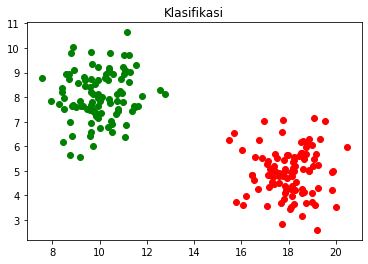

In [ ]:
plt.scatter(data_frame_1.x1,data_frame_1.x2,c="red")
plt.scatter(data_frame_2.x1,data_frame_2.x2,c="green")
plt.title("Klasifikasi")
plt.show()

# Form of the Resulting Neural Network

## 1. Matriks Weight

In [ ]:
w11 = np.random.uniform(-0.05,0.05)
w12 = np.random.uniform(-0.05,0.05)
w21 = np.random.uniform(-0.05,0.05)
w22 = np.random.uniform(-0.05,0.05)

W = np.array([[w11,w12],[w21,w22]])

In [ ]:
print(W)

[[-0.0121513   0.02069133]
 [ 0.02502372 -0.01405188]]


## 2. The resulting Neural Network iterations

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
learning_rate = 0.1
answer = []
error_array = np.zeros((2,len(data_frame)))
for index,baris in data_frame.iterrows():
    W_lama = W
    input = np.array([[baris.x1],[baris.x2]])
    output_hidden = np.dot(W_lama,input)
    output_learn = sigmoid(output_hidden)
    output_actual = np.array([[baris.y1],[baris.y2]])

    error = output_actual - output_learn

    delta_W = np.dot(learning_rate*error*output_learn*(1-output_learn),input.T)

    W_baru = W_lama + delta_W
    W = W_baru

    error_array[:,index] = error.T*error.T

    prediksi_herlambang = np.argmax(output_learn)
    jawaban_herlambang = np.argmax(output_actual)

    label_prediksi = "krisna" if prediksi_herlambang == 1 else "dominik"

    print(f"index = {index}, prediksi = {label_prediksi}, jawaban = {baris.label}")

    if prediksi_herlambang == jawaban_herlambang:
        answer.append(1)
    else:
        answer.append(0)

index = 0, prediksi = krisna, jawaban = krisna
index = 1, prediksi = krisna, jawaban = krisna
index = 2, prediksi = krisna, jawaban = krisna
index = 3, prediksi = krisna, jawaban = krisna
index = 4, prediksi = krisna, jawaban = dominik
index = 5, prediksi = krisna, jawaban = krisna
index = 6, prediksi = krisna, jawaban = dominik
index = 7, prediksi = krisna, jawaban = dominik
index = 8, prediksi = dominik, jawaban = dominik
index = 9, prediksi = dominik, jawaban = dominik
index = 10, prediksi = dominik, jawaban = krisna
index = 11, prediksi = dominik, jawaban = dominik
index = 12, prediksi = dominik, jawaban = krisna
index = 13, prediksi = dominik, jawaban = dominik
index = 14, prediksi = dominik, jawaban = dominik
index = 15, prediksi = dominik, jawaban = dominik
index = 16, prediksi = dominik, jawaban = krisna
index = 17, prediksi = dominik, jawaban = dominik
index = 18, prediksi = dominik, jawaban = dominik
index = 19, prediksi = dominik, jawaban = dominik
index = 20, prediksi = dom

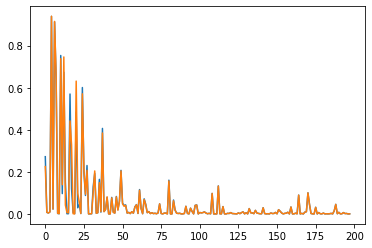

In [ ]:
plt.plot(error_array.T)

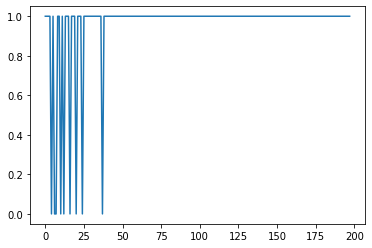

In [ ]:
plt.plot(answer)